In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/MRI-ESM2-0_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.5582200050354e-12

In [6]:
data['k_no_ch3o2'].median()

8.195091295242309e-12

In [7]:
data['k_o3_oh'].median()

6.159847564995288e-14

In [8]:
data['k_o3_ho2'].median()

1.80408852853292e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.735316759134441e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     1.017926e+08
std      1.161205e+08
min      1.635250e+04
25%      1.389389e+07
50%      5.066793e+07
75%      1.634243e+08
max      6.719771e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    9.720000e+05
mean     1.055557e+06
std      1.201472e+06
min      1.742188e+02
25%      1.020759e+05
50%      5.479556e+05
75%      1.799636e+06
max      1.831110e+07
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    972000.000000
mean        186.460982
std         177.895193
min           0.499327
25%          78.529714
50%         152.198604
75%         230.345198
max        1948.656895
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    972000.000000
mean          0.307118
std           0.172418
min           0.003401
25%           0.164243
50%           0.335924
75%           0.419594
max           1.528890
Name: P1_frac, dtype: float64

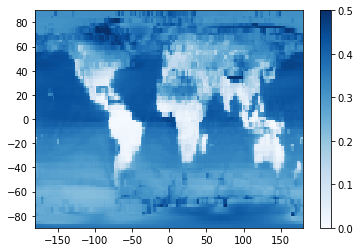

In [23]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [17]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.307118
std          0.104561
min          0.004736
25%          0.265275
50%          0.322396
75%          0.381997
max          0.563652
Name: P1_frac, dtype: float64

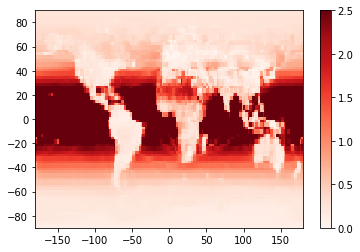

In [24]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [19]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.754211e-08,2.336547e-14,4.840957e-14,0.000000e+00,0.000000e+00,245.63487,...,6.500000e-11,14070.686034,29152.243054,10454.230541,33474.575708,4.551715e-13,3.154034e+07,149.301958,9932.451697,0.705897
1,3.0,-89.0,1.0,2911.0,1.751341e-08,2.332420e-14,4.801625e-14,0.000000e+00,0.000000e+00,245.64409,...,6.500000e-11,14045.834444,28915.388761,10360.419223,33351.554077,4.551462e-13,3.144905e+07,148.935621,9932.603369,0.707157
2,5.0,-89.0,1.0,4911.0,1.744699e-08,2.322402e-14,4.737500e-14,0.000000e+00,0.000000e+00,245.48904,...,6.500000e-11,13985.506048,28529.225000,10219.086496,33077.563314,4.555735e-13,3.125500e+07,148.654812,9906.502108,0.708341
3,7.0,-89.0,1.0,6911.0,1.744699e-08,2.322402e-14,4.737500e-14,0.000000e+00,0.000000e+00,245.48055,...,6.500000e-11,13985.506048,28529.225000,10219.086496,33077.563314,4.555969e-13,3.125439e+07,148.646778,9907.027804,0.708378
4,9.0,-89.0,1.0,8911.0,1.745826e-08,2.328491e-14,4.718132e-14,0.000000e+00,0.000000e+00,245.57079,...,6.500000e-11,14022.172802,28412.593313,10163.669643,33072.289246,4.553481e-13,3.121678e+07,148.019231,9943.550450,0.709131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,2.287199e-08,7.559570e-16,1.561717e-15,7.690745e-14,1.949230e-16,251.85805,...,6.500000e-11,455.237305,940.465917,82.652763,562.043678,4.387624e-13,4.806739e+05,713.909148,121.114244,0.266046
971996,-7.0,89.0,60.0,-6911.0,2.284715e-08,1.474946e-16,1.534075e-15,4.297552e-15,1.089221e-17,251.88918,...,6.500000e-11,88.821266,923.819664,69.291583,482.988849,4.386838e-13,5.142405e+05,899.213634,7.631525,0.085920
971997,-5.0,89.0,60.0,-4911.0,2.284715e-08,1.474946e-16,1.534075e-15,4.297552e-15,1.089221e-17,251.92060,...,6.500000e-11,88.821266,923.819664,69.291583,482.988849,4.386045e-13,5.141949e+05,899.246078,7.628877,0.085890
971998,-3.0,89.0,60.0,-2911.0,2.283424e-08,3.365895e-16,1.605734e-15,1.650221e-14,4.182508e-17,251.93549,...,6.500000e-11,202.694197,966.973135,75.874785,525.512419,4.385670e-13,5.369044e+05,860.434979,30.087751,0.148439


In [20]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/MRI-ESM2-0_diag_2014(0319).csv', index = False)